# Whole Sales Customer Data

Submitted By: GROUP-9

Anisha Siwas-025007

Sarthak Jain-025029

Tanya Goel-025034

**Dataset Information:**
The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

Importing the required libraries.

In [108]:
# Data manipulation and plotting modules
import numpy as np
import pandas as pd


# Data pre-processing
from sklearn.preprocessing import StandardScaler as ss

# Dimensionality reduction
from sklearn.decomposition import PCA


# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# For plot formulation
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Needed for Bayes optimization
# Takes an estimator, performs cross-validation
# and gives out average score
from sklearn.model_selection import cross_val_score

Reading file.

In [109]:
data = pd.read_csv("C:\\Users\\Anisha Siwas\\Downloads\\Wholesale customers data.csv")

# Data Exploration and Cleaning

Checking first 5 rows in dataset and getting an overview of what is dataset all about and what all columns are there.

In [110]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Checking basic information about dataset like: columns, null values and datatypes. 

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Describing the dataset. Calculating mean, standard deviation  etc. for each column.

In [112]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [113]:
data.shape

(440, 8)

Checked for shape of dataset. This dataset contains 440 rows and 8 columns.

In [114]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

Checked for all the features/column names of dataset.

Now checking wheather dataset is balanced or not. Classes are not unbalanced

In [115]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

Checking for data types of each feature.

In [116]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Checking for null values. There are no null values.

In [117]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Checking how many unique values are there in each column.

In [118]:
data.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

# Data Visualization

In [119]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

Checking count for each channel in order to know how many wholesale customers used which channel and which channel is used more. It can be seen that channel 1 is used more as compared to channel 2.

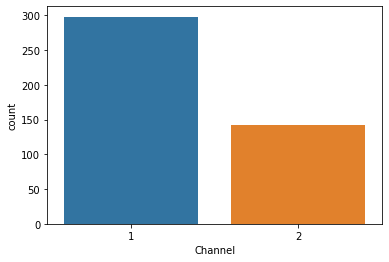

In [120]:
import seaborn as sns
ax=sns.countplot(x='Channel',data=data);

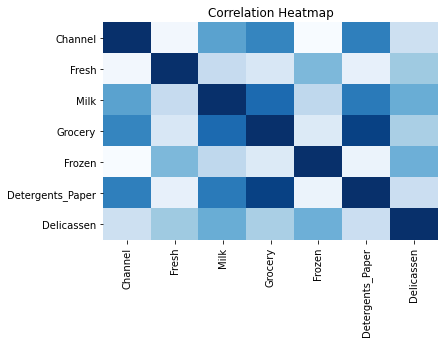

In [121]:
ax= plt.axes()
_=sns.heatmap(data.drop(columns=['Region']).corr(),cmap='Blues',cbar=None,ax=ax)
_=ax.set_title('Correlation Heatmap')

Checking for outliers in Fresh column for both the channels. And it can be easily inferred from the box plot that outliers exists for both the channel. 

<AxesSubplot:xlabel='Channel', ylabel='Fresh'>

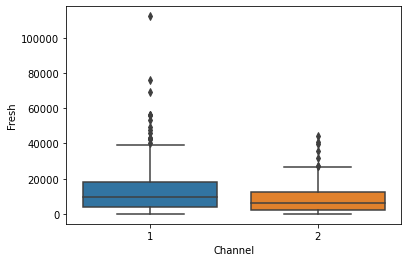

In [122]:
sns.boxplot(x = 'Channel',      
            y = 'Fresh',               
            data = data
            )

Checking from both the channels which region demands for most the fresh products. And it can inferred from the graph below that region 3 demands the most fresh product from channel 1 and region 1 demands the least fresh products from channel 2. Likewise we will be checking for other product categories as well.

<AxesSubplot:xlabel='Channel', ylabel='Fresh'>

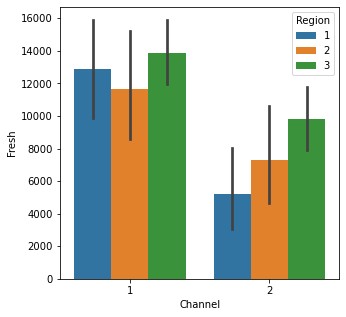

In [123]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Fresh',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

It can inferred from the below graph that region 3 demands the most milk product from channel 2 and region 2 demands the least milk products from channel 1.

<AxesSubplot:xlabel='Channel', ylabel='Milk'>

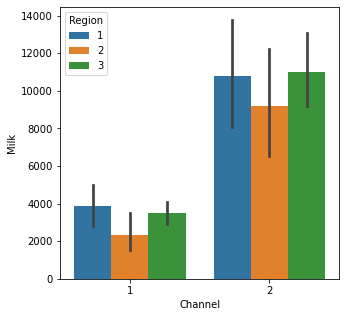

In [124]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Milk',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

It can inferred from the below graph that region 1 demands the most grocery product from channel 2 and region 1 & 3 demands the least grocery products from channel 1.

<AxesSubplot:xlabel='Channel', ylabel='Grocery'>

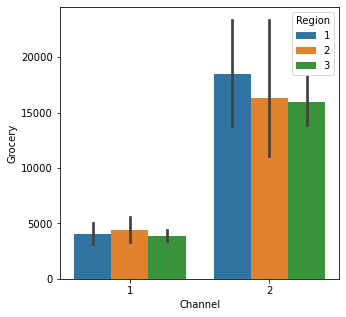

In [125]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Grocery',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

It can inferred from the below graph that region 2 demands the most frozen product from channel 1 and region 2 & 3 demands the least frozen products from channel 2.

<AxesSubplot:xlabel='Channel', ylabel='Frozen'>

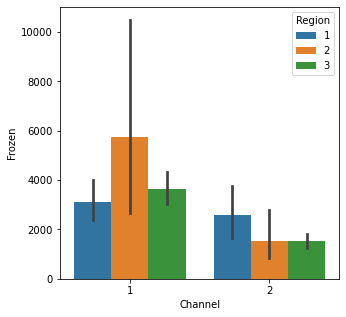

In [126]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Frozen',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

It can inferred from the below graph that region 2 demands the most detergent paper products from channel 2 and region 2 demands the least detergent paper products from channel 1.

<AxesSubplot:xlabel='Channel', ylabel='Detergents_Paper'>

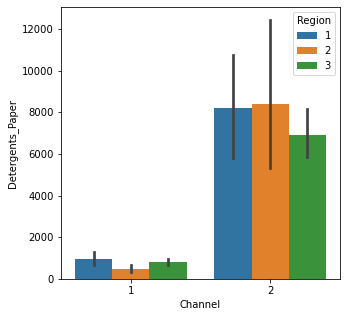

In [127]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Detergents_Paper',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

It can inferred from the below graph that region 1 demands the most delicassen product from channel 2 and region 2 demands the least delicassen products from channel 1.

<AxesSubplot:xlabel='Channel', ylabel='Delicassen'>

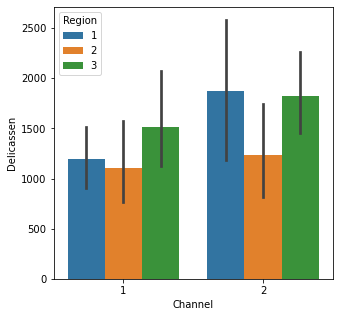

In [128]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Delicassen',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

**After doing the visulaization it can be concluded that though the number of times a channel has been used is more for channel 1 but after seeing all other boxplots and barplots for all the features the mean amount was higher for channel 1 only in case of fresh and frozen products apart from these two all other products like grocery, detergent paper and delicassen, the mean amount was higher for channel 2.**

# Feature engineering--creating new features

we will be creating perishable and non perishable products features.

**wheather most of the medium ranged sellers are thorugh channel 1 or 2... for this add label for each column... we can do this for perishable and non perishable columns**

Creating a new column named as Perishable_Products which is sum of all the persihable items that particular sale has.

In [132]:
data['Perishable_Products'] = data['Fresh'] + data['Milk'] + data['Delicassen']

Creating a new column named as Non_Perishable_Products which is sum of all the non persihable items that particular sale has.

In [133]:
data['Non_Perishable_Products'] = data['Grocery'] + data['Detergents_Paper'] + data['Frozen']

Checking new columns in our dataset.

In [134]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Perishable_Products,Non_Perishable_Products
0,2,3,12669,9656,7561,214,2674,1338,23663,10449
1,2,3,7057,9810,9568,1762,3293,1776,18643,14623
2,2,3,6353,8808,7684,2405,3516,7844,23005,13605
3,1,3,13265,1196,4221,6404,507,1788,16249,11132
4,2,3,22615,5410,7198,3915,1777,5185,33210,12890


Checking from both the channels which region demands for most the perishable products.It can be easily inferred from the bar plot nelow that perishable products are supplied in equaly amount from both the channels and region 3 has highest demand for perishable products from channel 2.

<AxesSubplot:xlabel='Channel', ylabel='Perishable_Products'>

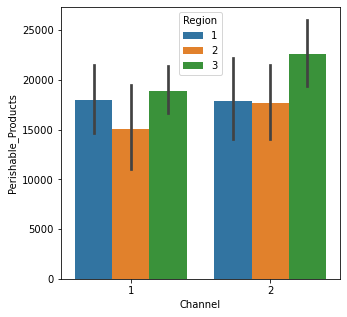

In [153]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Perishable_Products',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

Checking from both the channels which region demands for most the perishable products. An interesting thing which we found through this visualization is that there is huge gap in sale through both channels when it comes to non perishable products. Sale of non perishable products from channel 2 is nearly three times of sale of non perishable products from channel 1. 

<AxesSubplot:xlabel='Channel', ylabel='Non_Perishable_Products'>

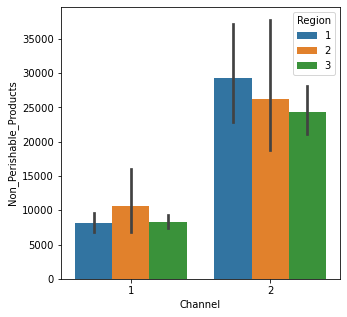

In [154]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Non_Perishable_Products',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

Now dividing data in perishable products feature into bins using qcut. Here we are using qcut in order to have equal count of data in all the three bins named l=low range sale, m=mid range sale and h=high range sale. We have shown how dividing data through cut divide the data unequally.

In [173]:
data["Perishable_Products_Cat"] = pd.cut(
                               data['Perishable_Products'],
                               bins = 3,
                               labels= ["l", "m", "h"]
                               )

In [174]:
data.Perishable_Products_Cat.value_counts()

l    422
m     15
h      3
Name: Perishable_Products_Cat, dtype: int64

From the graph below it can analyzed that all the high ranged sale for perishable products takes place in region 3 only when cut is used to divide data in bins.

<AxesSubplot:xlabel='Channel', ylabel='Perishable_Products_Cat'>

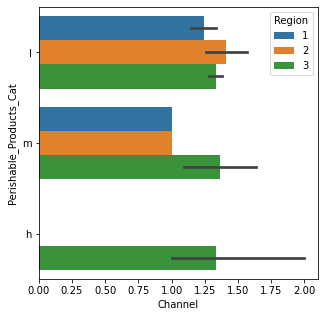

In [176]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Perishable_Products_Cat',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

As we can see that cut have divide the data unequally now using qcut instead.

In [177]:
data["Perishable_Products_Cat"] = pd.qcut(
                               data['Perishable_Products'],
                               q = 3,
                               labels= ["l", "m", "h"]
                               )

In [178]:
data.Perishable_Products_Cat.value_counts()

l    147
h    147
m    146
Name: Perishable_Products_Cat, dtype: int64

Now we can see that after qcut the data is divided into bins equally.

<AxesSubplot:xlabel='Channel', ylabel='Perishable_Products_Cat'>

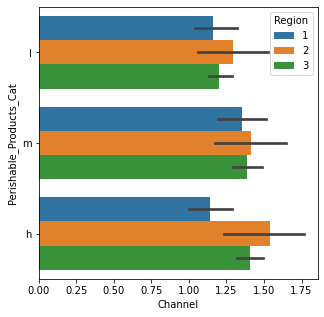

In [180]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Perishable_Products_Cat',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

In [186]:
data["Non_Perishable_Products_Cat"] = pd.cut(
                               data['Non_Perishable_Products'],
                               bins = 3,
                               labels= ["l", "m", "h"]
                               )

In [187]:
data.Non_Perishable_Products_Cat.value_counts()

l    425
m     13
h      2
Name: Non_Perishable_Products_Cat, dtype: int64

From the graph below it can analyzed that all the high ranged sale for non perishable products takes place in region 2 & 3 only when cut is used to divide data in bins.

<AxesSubplot:xlabel='Channel', ylabel='Non_Perishable_Products_Cat'>

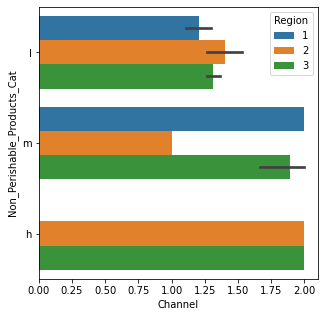

In [188]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Non_Perishable_Products_Cat',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

In [189]:
data["Non_Perishable_Products_Cat"] = pd.qcut(
                               data['Non_Perishable_Products'],
                               q = 3,
                               labels= ["l", "m", "h"]
                               )

Now we can see that after qcut the data is divided into bins equally.

<AxesSubplot:xlabel='Channel', ylabel='Non_Perishable_Products_Cat'>

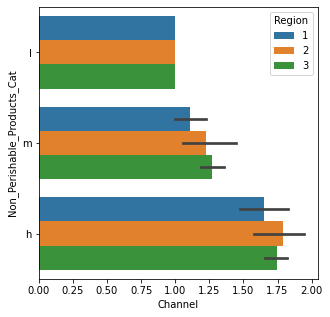

In [190]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'Channel',
            y = 'Non_Perishable_Products_Cat',
            hue = 'Region',       
            estimator = np.mean,
            data =data)

Now lets rename the columns with shorter names.

In [192]:
new_col_names  = {
                 'Perishable_Products'         : 'Perishable_P',
                 'Non_Perishable_Products'     : 'Non_Perishable_P',
                 'Perishable_Products_Cat'     : 'PP_Cat',
                 'Non_Perishable_Products_Cat' : 'Non_PP_Cat'
              }

In [193]:
data.rename(
         columns = new_col_names,
         inplace = True,
         )

In [194]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Perishable_P,Non_Perishable_P,PP_Cat,Non_PP_Cat
0,2,3,12669,9656,7561,214,2674,1338,23663,10449,h,m
1,2,3,7057,9810,9568,1762,3293,1776,18643,14623,m,h
2,2,3,6353,8808,7684,2405,3516,7844,23005,13605,h,m
3,1,3,13265,1196,4221,6404,507,1788,16249,11132,m,m
4,2,3,22615,5410,7198,3915,1777,5185,33210,12890,h,m


# Discovering structure in dataset.

In [195]:
## D. Data preprocessing
# 1.4.1 Scaling data in various manner
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import make_pipeline
## Manifolds
from sklearn.manifold import TSNE

from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import log_loss
## G: Others
# 1.10 Misc/visualization
import os, time, gc
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Perishable_P,Non_Perishable_P,PP_Cat,Non_PP_Cat
0,2,3,12669,9656,7561,214,2674,1338,23663,10449,h,m
1,2,3,7057,9810,9568,1762,3293,1776,18643,14623,m,h
2,2,3,6353,8808,7684,2405,3516,7844,23005,13605,h,m
3,1,3,13265,1196,4221,6404,507,1788,16249,11132,m,m
4,2,3,22615,5410,7198,3915,1777,5185,33210,12890,h,m
...,...,...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,43958,29344,h,h
436,1,3,39228,1431,764,4510,93,2346,43005,5367,h,l
437,2,3,14531,15488,30243,437,14841,1867,31886,45521,h,h
438,1,3,10290,1981,2232,1038,168,2125,14396,3438,m,l


Poping out the target variable in order to separate predictors and target.

In [197]:
y = data.pop("Channel")

We added new features during feature engineering of dataset and extracted all the needed information for our dataset. Now those added features are no more useful for us so we can drop them. We will be dropping just few of those features and not all the features.

In [198]:
data.drop(labels='Non_PP_Cat', axis=1, inplace=True)

In [199]:
data.drop(labels='PP_Cat', axis=1, inplace=True)

In [200]:
data

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Perishable_P,Non_Perishable_P
0,3,12669,9656,7561,214,2674,1338,23663,10449
1,3,7057,9810,9568,1762,3293,1776,18643,14623
2,3,6353,8808,7684,2405,3516,7844,23005,13605
3,3,13265,1196,4221,6404,507,1788,16249,11132
4,3,22615,5410,7198,3915,1777,5185,33210,12890
...,...,...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204,43958,29344
436,3,39228,1431,764,4510,93,2346,43005,5367
437,3,14531,15488,30243,437,14841,1867,31886,45521
438,3,10290,1981,2232,1038,168,2125,14396,3438


Creating just an alias of predictor dataset. X is just an another name of data.

In [201]:
X = data    
X.shape    

(440, 9)

Splitting the dataset into train and validation parts. Here we have splitted our dataset in such a manner that 80% of the dataset will be used for training the model and other 20% of the dataset will be used to test the model.

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    shuffle = True,
                                                    stratify = y
                                                    )

In [205]:
# 4.1 Note the use of f-string for printing
f"X_train shape: {X_train.shape}"   
print(X_train.shape)
f"X_test.shape : {X_test.shape}"     
print(X_test.shape)
f"y_train shape: {y_train.shape}"    
print(y_train.shape)
f"y_test shape : {y_test.shape}"  
print(y_test.shape)

(352, 9)
(88, 9)
(352,)
(88,)


Now we will be separating out categorical and numerical features.

In [206]:
print("\n--Unique values in each column")
X_train.nunique()        # Total no of unique values in each column

# If no. of unique values less than 5, it is categorical
print("\n\n--All 'True' are Categorical----")
X_train.nunique() < 5    # All True are categorical


--Unique values in each column


--All 'True' are Categorical----


Region               True
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
Perishable_P        False
Non_Perishable_P    False
dtype: bool

Only Region feature from the training dataset comes out to be a categorical feature.

In [211]:
cat_cols = ['Region']
print(cat_cols)
num_cols = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','Perishable_P','Non_Perishable_P']
num_cols

['Region']


['Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen',
 'Perishable_P',
 'Non_Perishable_P']

Using T-sne dimensionality reduction to discover if data possess any structure.

Visualizing t-SNE

In [219]:
%time
tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=30, n_iter=300).fit_transform(df)

Wall time: 0 ns


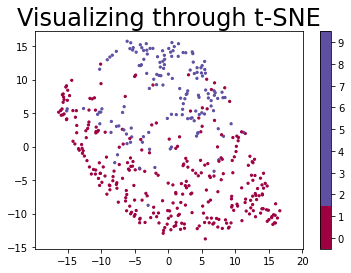

In [220]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing through t-SNE', fontsize=24);

Visualising TSNE in 3D

In [217]:
%time
pca_tsne2 = TSNE(random_state = 42, n_components=3, verbose=0, perplexity=40, n_iter=300).fit_transform(tsne)

Wall time: 0 ns


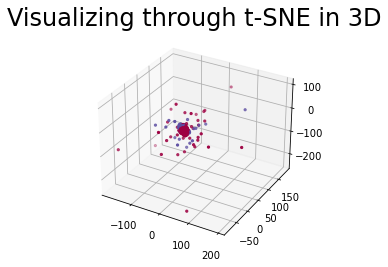

In [218]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_tsne2[:, 0], pca_tsne2[:, 1],pca_tsne2[:,2], s= 5, c=y, cmap='Spectral')
plt.title('Visualizing through t-SNE in 3D', fontsize=24);
plt.show()

# Data pipelining for data processing and modeling--

we have already divided cat_cols and num_cols. Now we will further sub divide. During data visulaization we saw that there were outliers so we will use median instead of mean for all num_cols.

In [221]:
num_cols_median = ['Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen',
 'Perishable_P',
 'Non_Perishable_P']

We are using most frequent and not constant as we do not have missing values.

In [222]:
cat_cols_mf       = ['Region']      #As we have only 1 categorical variable.

We do not need to split dataset or pop out target variable now as we already did it earlier when we were discovering structure in dataset.

## Creating pipes.

In [223]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Instantiating pipeline object for processing cat data. Impute = most_frequent.

In [224]:
pipe1  =  Pipeline(
                     [
                      ('mf', SimpleImputer(strategy='most_frequent')),
                      ('ohe', OneHotEncoder())
                     ]
                   )

Instantiating pipeline object for processing numerical data. Impute = median.

In [226]:
pipe2    = Pipeline(
                     [
                      ('sm', SimpleImputer(strategy='median')),
                      ('ss2', StandardScaler())
                     ]
                  )

## Testing pipes.

Feeding data to each pipe to see if it is working.

In [227]:
pipe1.fit_transform(X_train[cat_cols_mf])
pipe2.fit_transform(X_train[num_cols_median])

array([[-0.19856845, -0.63954949, -0.53578079, ..., -0.24555749,
        -0.4718194 , -0.53087885],
       [-0.89786759,  1.63393076, -0.657714  , ...,  0.81356788,
         0.19809834, -0.39564649],
       [-0.41060017, -0.58638218, -0.60278822, ..., -0.17229078,
        -0.592485  , -0.61579373],
       ...,
       [-0.39254189, -0.70196328, -0.76685489, ..., -0.44558208,
        -0.67781727, -0.82587747],
       [ 0.4247482 , -0.57353983, -0.61852481, ..., -0.14019607,
         0.03694663, -0.63256622],
       [-0.9414064 , -0.66960057, -0.62197671, ..., -0.4744349 ,
        -1.07475103, -0.78167701]])

## Collecting pipes into ColumnTransformer

Collecting all pipes in column transformer along the column names. All pipes operate parallely.

In [228]:
#  (some-name,  transformer,   col-names)
ct_transformer = ColumnTransformer(
                                    [
                                      ('p_mf',   pipe1,   cat_cols_mf),
                                     
                                      ('p_med',  pipe2,   num_cols_median)
                                   
                                    ]
                                  )

## Testing Column Transformer

In [231]:
ct_transformer.fit_transform(X_train)

array([[ 0.        ,  0.        ,  1.        , ..., -0.24555749,
        -0.4718194 , -0.53087885],
       [ 0.        ,  0.        ,  1.        , ...,  0.81356788,
         0.19809834, -0.39564649],
       [ 0.        ,  1.        ,  0.        , ..., -0.17229078,
        -0.592485  , -0.61579373],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.44558208,
        -0.67781727, -0.82587747],
       [ 1.        ,  0.        ,  0.        , ..., -0.14019607,
         0.03694663, -0.63256622],
       [ 0.        ,  0.        ,  1.        , ..., -0.4744349 ,
        -1.07475103, -0.78167701]])

Final Pipeline for transformation and modeling.

In [232]:
outer_pipe = Pipeline(
                      [
                       ('ct', ct_transformer),        # Column transformer object
                       ('dt', DecisionTreeClassifier()) # Estimator
                      ]
                     )

Train on data using final pipe.

In [233]:
outer_pipe.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_mf',
                                                  Pipeline(steps=[('mf',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Region']),
                                                 ('p_med',
                                                  Pipeline(steps=[('sm',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss2',
                                                                   StandardScaler())]),
                                                  ['Fresh', 'Milk', 'Grocery',
                                      

Making prediction on test data. Here we do not need to transform X_test separately as pipes take care of that.

In [234]:
outer_pipe.predict(X_test)

array([1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1],
      dtype=int64)

Transforming y_test

In [236]:
y_test

424    2
326    1
229    1
46     2
177    1
      ..
366    1
208    1
390    1
265    1
133    1
Name: Channel, Length: 88, dtype: int64

Display pipeline as diagram.

In [237]:
from sklearn import set_config
set_config(display='diagram')
outer_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_mf',
                                                  Pipeline(steps=[('mf',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Region']),
                                                 ('p_med',
                                                  Pipeline(steps=[('sm',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss2',
                                                                   StandardScaler())]),
                                                  ['Fresh', 'Milk', 'Grocery',
                                                   'Frozen', 'Detergents_Paper',
                                                   'Delicassen', 'Perishable_P',
                                                   'Non_Perishable_P'])])),
                ('dt', DecisionTreeClassifier())])

Pipeline as text.

In [238]:
set_config(display='text')
outer_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_mf',
                                                  Pipeline(steps=[('mf',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Region']),
                                                 ('p_med',
                                                  Pipeline(steps=[('sm',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss2',
                                                                   StandardScaler())]),
                                                  ['Fresh', 'Milk', 'Grocery',
                                      

# Cross Validation

In [239]:
from sklearn.model_selection import cross_val_score


In [240]:
from skopt import BayesSearchCV

In [242]:
from skopt.space import Real, Categorical, Integer

We will be using StratifiedKFold in order to get equal proportion of data variety in both train dataset and test dataset.

In [244]:
cvStrategy = StratifiedKFold(
                             n_splits=3,
                             shuffle=True,
                             random_state=42
                            )

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

The list of models that we will be using as follows:

In [246]:
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [247]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, y_train)
    
    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)

In [248]:
compare_models_train_test()

Accuracy score of the  LogisticRegression(max_iter=1000)  =  0.9204545454545454
Accuracy score of the  SVC(kernel='linear')  =  0.8977272727272727
Accuracy score of the  KNeighborsClassifier()  =  0.9090909090909091
Accuracy score of the  RandomForestClassifier()  =  0.9431818181818182


Applying cross validation in LogisticRegression model and comparing the average accuracy we get with the cv and without the cv. We can see that without cv the accuracy was 92.04% and with cv the accuracy becomes 88.18%. 

In [249]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5)

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.86363636 0.93181818 0.79545455 0.93181818 0.88636364]
88.18


Likewise we have defined a function to get the average accuracy for all other models and we have taken cv as 5 for all the models. 

In [250]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,y, cv=5)
    
    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


Now comparing the accuracy of all the models without cross validation and with cross validation. Without cv RandomForestClassifier performed the best and even with cv RandomForestClassifier performed the best but the accuracy of the same decreased from 94.31% to 92.73%.

In [251]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.86363636 0.93181818 0.79545455 0.93181818 0.88636364]
Accuracy % of the  LogisticRegression(max_iter=1000) 88.18
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.84090909 0.93181818 0.875      0.90909091 0.875     ]
Accuracy % of the  SVC(kernel='linear') 88.64
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.89772727 0.88636364 0.89772727 0.92045455 0.85227273]
Accuracy % of the  KNeighborsClassifier() 89.09
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.90909091 0.92045455 0.94318182 0.95454545 0.90909091]
Accuracy % of the  RandomForestClassifier() 92.73
----------------------------------------------


# Hyperparameter Tuning

In [87]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

GridSearchCV is used for determining the best parameters for our model

Loading SVC(Super Vector Classifier) model.

In [88]:
model = SVC()

Hyperparameters

In [89]:
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

GridSearch

In [90]:
classifier = GridSearchCV(model, parameters, cv=5)

Fitting data to our model.

In [91]:
classifier.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [92]:
classifier.cv_results_

{'mean_fit_time': array([6.38423444e+01, 3.43246460e-03, 2.90827751e-03, 3.12423706e-03,
        5.64799142e+01, 3.93648148e-03, 8.65793228e-03, 3.12418938e-03,
        9.01138692e+01, 3.12428474e-03, 3.12452316e-03, 6.25648499e-03,
        5.72319026e+01, 6.24885559e-03, 3.12442780e-03, 3.21588516e-03]),
 'std_fit_time': array([2.22392888e+01, 6.12187531e-03, 5.81655502e-03, 6.24847412e-03,
        1.02309116e+01, 7.87296295e-03, 7.18914795e-03, 6.24837875e-03,
        7.78295354e+01, 6.24856949e-03, 6.24904633e-03, 7.66260476e-03,
        2.15762833e+01, 7.65325443e-03, 6.24885559e-03, 5.25422940e-03]),
 'mean_score_time': array([0.00079613, 0.00312648, 0.00313144, 0.00311799, 0.00020018,
        0.00312324, 0.        , 0.        , 0.00040498, 0.00312233,
        0.00321908, 0.        , 0.        , 0.00312281, 0.00312414,
        0.        ]),
 'std_score_time': array([0.00097506, 0.00625296, 0.00626287, 0.00623598, 0.00040035,
        0.00624647, 0.        , 0.        , 0.00080996, 

Looking for the parameters that performed the best.

In [93]:
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 20, 'kernel': 'poly'}


Checking the highest accuracy that we got from the best parameters in GridSearchCV..

In [94]:
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9204545454545455


RandomizedSearchCV

Loading SVC(Super Vector Classifier) model.

In [95]:
model = SVC()

Hyperparameters

In [96]:
parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

RandomizedSearch

In [97]:
classifier = RandomizedSearchCV(model, parameters, cv=5)

Fitting the data to our model.

In [98]:
classifier.fit(X, y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [99]:
classifier.cv_results_

{'mean_fit_time': array([4.19802666e-03, 3.59263420e-03, 5.91551264e+01, 4.58641052e-03,
        9.27152972e+01, 3.98874283e-03, 4.18791771e-03, 5.59998995e+01,
        4.78830338e-03, 5.99088669e-03]),
 'std_fit_time': array([4.05910369e-04, 1.94841545e-03, 2.62019921e+01, 4.88698988e-04,
        8.26471679e+01, 6.30524895e-04, 3.99065089e-04, 9.18637808e+00,
        7.46909368e-04, 6.43729150e-04]),
 'mean_score_time': array([0.0029933 , 0.00119467, 0.00079732, 0.0021965 , 0.00218301,
        0.00139675, 0.00219541, 0.00179291, 0.00199294, 0.00180135]),
 'std_score_time': array([1.09175440e-03, 9.75447051e-04, 9.76513353e-04, 3.97506865e-04,
        3.83377443e-04, 4.88441518e-04, 3.99090693e-04, 3.98057536e-04,
        4.17334680e-06, 7.45856949e-04]),
 'param_kernel': masked_array(data=['rbf', 'poly', 'linear', 'rbf', 'linear', 'sigmoid',
                    'rbf', 'linear', 'sigmoid', 'poly'],
              mask=[False, False, False, False, False, False, False, False,
            

Looking for the parameters that performed the best.

In [100]:
best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'rbf', 'C': 20}


Checking the highest accuracy that we got from the best parameters in RandomizedSearchCV.

In [101]:
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9136363636363637


Therefore, it can definately be concluded that using RandomizedSearchCV on big dataset is better as it saves alot of time without hampering much of the accuracy. 